In [30]:
import netCDF4
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
import os
import fnmatch
import csv
# import logging

from datetime import datetime, date
from matplotlib import gridspec
from matplotlib import cm
from astropy.time import Time

warnings.filterwarnings('ignore')
%matplotlib inline

In [23]:
def list_files_pattern(tdir, tpattern):
    """
    Looks for files matching pattern exist in directory,
    if not logs error and raises exception

    :param tdir: path to directory to be searched and tested
    :type tdir: str
    :param tpattern: file name pattern to be tested
    :type tpattern: str
    """
    if not os.path.isdir(tdir):
        print('Dir not found')
        return []

    matches = fnmatch.filter(os.listdir(tdir), tpattern)

    if matches:
        print('Dir found, and Pattern matches')
        return matches
    else:
        print('Dir found, and Pattern not match')
        return []

In [24]:
DIR = 'GlobTemp/11x11/Test'
PATTERN = 'GT_SSD-L2-GOES__LST_2*.nc'
file_list = [os.path.join(DIR, f) for f in list_files_pattern(tdir=DIR, tpattern=PATTERN)]
print(file_list[:5])

Dir found, and Pattern matches
['GlobTemp/11x11/Test\\GT_SSD-L2-GOES__LST_2-20150501_000000-LIPM-0.05X0.05-V1.0.nc', 'GlobTemp/11x11/Test\\GT_SSD-L2-GOES__LST_2-20150501_010000-LIPM-0.05X0.05-V1.0.nc', 'GlobTemp/11x11/Test\\GT_SSD-L2-GOES__LST_2-20150501_020000-LIPM-0.05X0.05-V1.0.nc', 'GlobTemp/11x11/Test\\GT_SSD-L2-GOES__LST_2-20150501_030000-LIPM-0.05X0.05-V1.0.nc', 'GlobTemp/11x11/Test\\GT_SSD-L2-GOES__LST_2-20150501_040000-LIPM-0.05X0.05-V1.0.nc']


In [25]:
LST_org = []
time_org = []
for filename in file_list:
    f = netCDF4.Dataset(filename, 'r')
    LST_org.append(f.variables['LST'][2,6])
    time_org.append(f.variables['jul_date'][0])

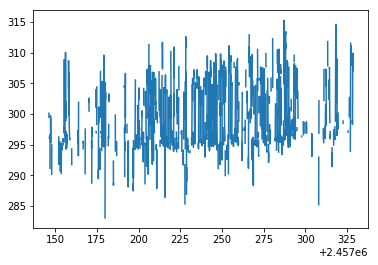

In [26]:
plt.plot(time_org,LST_org)

In [27]:
print(LST_org[:100])

[masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, masked, 295.16, masked, masked, 291.47, masked, 300.09, 299.44998, masked, masked, masked, masked, masked, 296.15, 296.0, masked, masked, masked, masked, masked, masked, 291.13998, 292.53998, 294.75, 296.6, 296.47998, masked, masked, masked, masked, 299.68, 298.28998, 295.22998, 299.31, masked, masked, masked, masked, masked, masked]


In [28]:
# t = Time(jul_date,format='jd')
# t.datetime64
time = [Time(i,format='jd').datetime for i in time_org] 

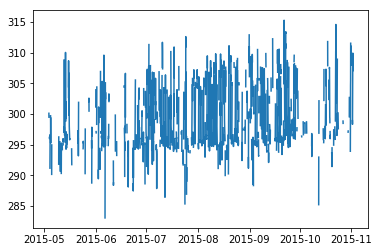

In [29]:
plt.plot(time,LST_org)

In [37]:
time_list = [datetime.strftime(i,format = '%Y%m%d%H%M') for i in time]
print(time_list[:5])

['201505010000', '201505010059', '201505010200', '201505010300', '201505010359']


In [38]:
np.savetxt("LST_GEOS_v2.csv", np.column_stack((time_list, LST_org)), delimiter=",", fmt='%s', header="Time,LST(K)")

In [40]:
# FILE = 'GlobTemp\Test\GT_SSD-L2-GOES__LST_2-20150501_040000-LIPM-0.05X0.05-V1.0.nc'
# f = netCDF4.Dataset(FILE, 'r')
# print(f)
# print(f.variables['LST'][2,6])

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.6
    title: Land Surface Temperature from Geostationary Operational Environmental Satellite
    summary: This file contains land surface temperature (LST) data in a harmonised format from operational Geostationary Operational Environmental Satellite (GOES) Level-2 observations. By using these data, you agree to cite the papers given in the references metadata field in any publications derived from them
    institution: IPMA
    history: Wed Sep 18 18:58:15 2019: ncks -d nj,1650,1660 -d ni,1910,1920 -O /mount/dmz28/www/globtemp/data/ftp/DATA/GOES/2015/05/GT_SSD-L2-GOES__LST_2-20150501_040000-LIPM-0.05X0.05-V1.0.nc GT_SSD-L2-GOES__LST_2-20150501_040000-LIPM-0.05X0.05-V1.0.nc
Created using software developed at IPMA
    comment: These data were reformatted using software developped by IPMA
    license: Data use is free and open
    id: GT_SSD-L2-GOES__LST_2
    date_created: 08-10-

In [33]:
# print(f.variables['LST'])

<class 'netCDF4._netCDF4.Variable'>
int16 LST(nj, ni)
    _FillValue: -8000
    long_name: land surface temperature
    standard_name: surface_temperature
    units: K
    valid_min: -8000
    valid_max: 7000
    coordinates: lat lon
    comment: GOES pixel land surface temperature product
    scale_factor: 0.01
    add_offset: 273.15
unlimited dimensions: 
current shape = (11, 11)
filling on


In [34]:
# scale_factor = 0.01
# add_offset = 273.15

In [35]:
# print(f.variables['LST'].shape)

(11, 11)


In [36]:
# print(f.variables['lat'][:5,:5])

[[-2.5       -2.5       -2.5       -2.5       -2.5      ]
 [-2.550003  -2.550003  -2.550003  -2.550003  -2.550003 ]
 [-2.5999985 -2.5999985 -2.5999985 -2.5999985 -2.5999985]
 [-2.6500015 -2.6500015 -2.6500015 -2.6500015 -2.6500015]
 [-2.7000046 -2.7000046 -2.7000046 -2.7000046 -2.7000046]]


In [37]:
# print(f.variables['lon'][:5,:10])

[[-60.5      -60.449997 -60.4      -60.35     -60.299995 -60.25
  -60.199997 -60.15     -60.1      -60.049995]
 [-60.5      -60.449997 -60.4      -60.35     -60.299995 -60.25
  -60.199997 -60.15     -60.1      -60.049995]
 [-60.5      -60.449997 -60.4      -60.35     -60.299995 -60.25
  -60.199997 -60.15     -60.1      -60.049995]
 [-60.5      -60.449997 -60.4      -60.35     -60.299995 -60.25
  -60.199997 -60.15     -60.1      -60.049995]
 [-60.5      -60.449997 -60.4      -60.35     -60.299995 -60.25
  -60.199997 -60.15     -60.1      -60.049995]]


In [38]:
# print(f.variables['LST'][2,6])

--


In [11]:
# print(f.variables['lat'][2,6])

-2.5999985


In [12]:
# print(f.variables['lon'][2,6])

-60.199997


In [13]:
# index at Manaus is [2,6] in the data

In [14]:
# LST_org = f.variables['LST']
# LST = [(i*scale_factor + add_offset) for i in LST_org]

In [15]:
# print(LST[5])

[-- -- -- -- -- -- -- -- -- -- --]


In [16]:
# print(np.mean(LST))

-8000.0


In [17]:
# print(f.variables['jul_date'])

<class 'netCDF4._netCDF4.Variable'>
float64 jul_date(time)
    long_name: julian date
    units: d
    comment: reference time in julian days at start of orbit
unlimited dimensions: 
current shape = (1,)
filling on, default _FillValue of 9.969209968386869e+36 used



In [18]:
# print(f.variables['jul_date'][0])

2457143.5


In [19]:
# print(f.variables['dtime'][0,0])

-2.1000001


In [20]:
# from astropy.time import Time

In [21]:
# jul_date = f.variables['jul_date'][0]

In [22]:
# t = Time(jul_date,format='jd')
# t.datetime64

numpy.datetime64('2015-05-01T00:00:00.000000000')

In [23]:
# print(t)

2457143.5


In [24]:
# print(t.datetime)

2015-05-01 00:00:00
